##

In [1]:
import geopandas as gpd
import os, os.path
import seaborn as sns
from scipy.stats.stats import pearsonr

/var/folders/1j/rxctbd0d60l078ctybj6ktrr673nl9/T/ipykernel_76634/2981243806.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
root = 'data'

build2play_shp = os.path.join(root, 'building2playground-censustract.shp')
build2play_gdf = gpd.read_file(build2play_shp)

In [3]:
build2play_gdf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,income,perHis,nonHispan,black,asian,und18,highschol,old65,playdist,geometry
0,42,101,014500,42101014500,145,Census Tract 145,G5020,S,321465,0,...,16.495,0.195396,0.026564,0.772727,0.018890,0.289256,0.161747,0.145809,1067.576954,"POLYGON ((2696627.315 244448.120, 2696698.907 ..."
1,42,101,031200,42101031200,312,Census Tract 312,G5020,S,429735,0,...,18.531,0.239535,0.109123,0.505546,0.120036,0.311449,0.181753,0.098748,2549.307289,"POLYGON ((2714890.709 265894.603, 2714931.049 ..."
2,42,101,021800,42101021800,218,Census Tract 218,G5020,S,1006008,0,...,32.183,0.032449,0.527582,0.303875,0.053064,0.209200,0.040657,0.102882,3973.959703,"POLYGON ((2671526.636 274669.516, 2672033.151 ..."
3,42,101,009100,42101009100,91,Census Tract 91,G5020,S,425574,0,...,26.835,0.035122,0.349919,0.329431,0.235122,0.032195,0.087805,0.212033,1821.603310,"POLYGON ((2682586.599 239186.067, 2682814.771 ..."
4,42,101,033600,42101033600,336,Census Tract 336,G5020,S,1153477,0,...,23.496,0.132390,0.642857,0.126450,0.077086,0.215276,0.084017,0.107638,3425.610565,"POLYGON ((2719080.860 276412.719, 2719388.820 ..."


####  Convert the feet to meter

In [4]:
build2play_gdf['playdist_m'] = build2play_gdf['playdist']/3.333

/var/folders/1j/rxctbd0d60l078ctybj6ktrr673nl9/T/ipykernel_76634/2367893781.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(color_gradient, n_class)


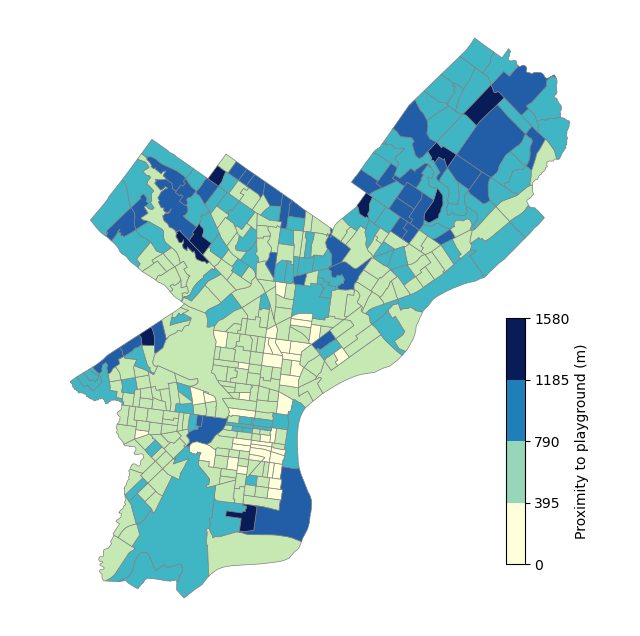

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a plot for the choropleth map
f, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

color_gradient = 'YlGnBu'

# set the color scheme
cmap = plt.cm.get_cmap(color_gradient, n_class)

# set the location of the legend
axins = ax.inset_axes([0.8, 0.1, 0.03, 0.4]) #x0, y0, width, height

# the field to plot the choropleth map
field = 'playdist_m'

# plot the choropleth map of blood lead in Philadelphia
build2play_gdf.plot(column=field, 
             cmap= color_gradient, 
             edgecolor='0.5',
             ax = ax,
             linewidth=0.5,
             scheme='equal_interval')

# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.EqualInterval(build2play_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, build2play_gdf[field].min())


# create a color bar for the map
norm = Normalize(vmin=build2play_gdf[field].min(), vmax=build2play_gdf[field].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)

cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='vertical', 
                                cax = axins,
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_ylabel('Proximity to playground (m)')

ax.set_axis_off()
plt.axis('equal')

# save the geoviz into a png file locally
# plt.savefig("Walking2playground_dist.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show(f)

### You can create a customized break method

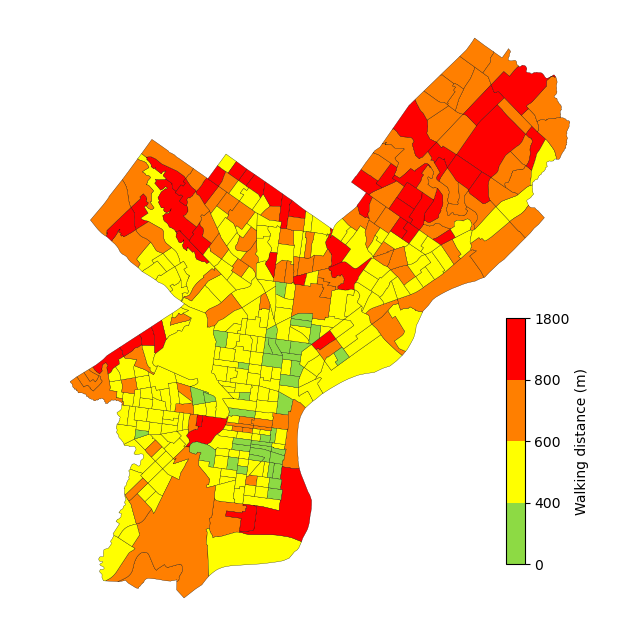

In [6]:
import matplotlib as mpl


# create a plot for the choropleth map
f, ax = plt.subplots(1, figsize=(8, 8))

# # plot the city limit as the background
# citylimit_projected.plot(ax=ax, alpha=0.2, color='grey', edgecolor='k')

# set the location of the legend
axins = ax.inset_axes([0.8, 0.1, 0.03, 0.4]) #x0, y0, width, height

# the field to plot the choropleth map
field = 'playdist_m'

breaks = [0, 400, 600, 800, 1800]


# set the color schemes
# cmap = plt.cm.get_cmap('YlGnBu', len(breaks)-1)
cmap = mpl.colors.ListedColormap(['#8dda44','yellow','#ff7f00','red'])

# create a color bar for the map
# norm = Normalize(vmin=build2play_heatgdf[field].min(), vmax=build2play_heatgdf[field].max())
norm = mpl.colors.BoundaryNorm(breaks, cmap.N)
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)

build2play_gdf.plot(column=field, 
                         edgecolor='black',
                         ax = ax,
                         linewidth=0.2,
                         cmap=cmap,
                         scheme='equal_interval') #

cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='vertical', 
                                cax = axins,
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=breaks, #vals
                                shrink=0.4)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_ylabel('Walking distance (m)')

ax.set_axis_off()
plt.axis('equal')

# save the geoviz into a png file locally
plt.savefig("build2play_distance.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)
plt.savefig("build2play_distance.eps", bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show(f)


### Customize the location legend and add a north arrow

/var/folders/1j/rxctbd0d60l078ctybj6ktrr673nl9/T/ipykernel_76634/1439433307.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlGnBu', 5)


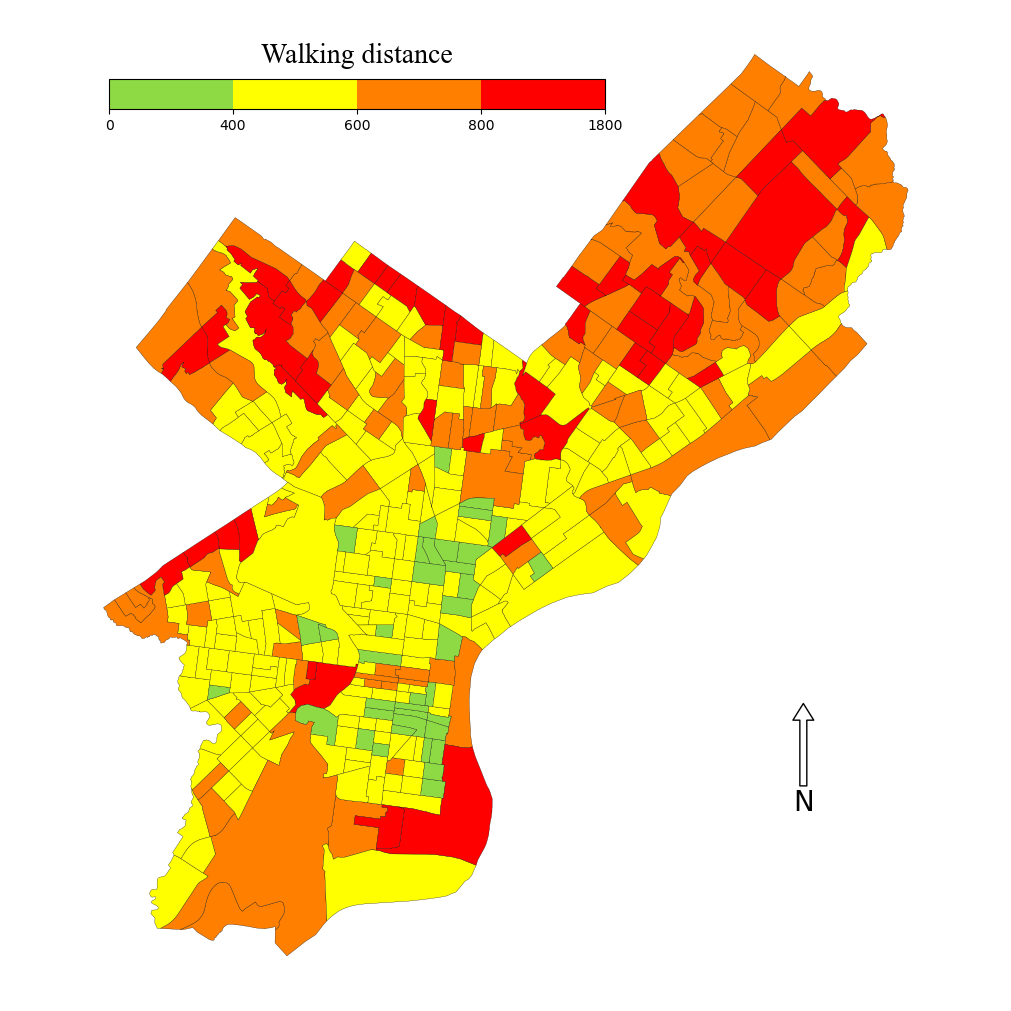

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import Normalize
from matplotlib import cm
# import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl


f, ax = plt.subplots(1, figsize=(10, 10), constrained_layout=True)


cmap = plt.cm.get_cmap('YlGnBu', 5)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#000004","#57106E","#BC3755", "#FA8D0A", '#FDFFA5'])

breaks = [0, 400, 600, 800, 1800]


# set the color schemes
# cmap = plt.cm.get_cmap('YlGnBu', len(breaks)-1)
cmap = mpl.colors.ListedColormap(['#8dda44','yellow','#ff7f00','red'])

# create a color bar for the map
# norm = Normalize(vmin=build2play_heatgdf[field].min(), vmax=build2play_heatgdf[field].max())
norm = mpl.colors.BoundaryNorm(breaks, cmap.N)
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)

build2play_gdf.plot(column=field, 
                         edgecolor='black',
                         ax = ax,
                         linewidth=0.2,
                         cmap=cmap,
                         scheme='equal_interval') #

cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='vertical', 
                                cax = axins,
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=breaks, #vals
                                shrink=0.4)

# create a color bar for the map
vals = [0, 400, 600, 800, 1800]

norm = Normalize(vmin=build2play_gdf['playdist_m'].min(), vmax=build2play_gdf['playdist_m'].max(), clip=True) #continue color bar
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)


axins = ax.inset_axes([0.1, 0.9, 0.5, 0.03]) #x0, y0, width, height

cbar = f.colorbar(n_cmap,
            orientation='horizontal',
            cax=axins,
            ax=ax,
            # spacing='proportional', # you can uncomment this to see the difference
            ticks=vals)

cbar.ax.set_xlabel('Walking distance',
                   labelpad=-65, 
                   y=0.45, 
                   fontsize=20, 
                   fontname='Times New Roman')

cbar.ax.xaxis.set_ticks_position('bottom') #change the tick 


x, y, arrow_length = 0.8, 0.3, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='white', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.set_axis_off()
plt.axis('equal')
plt.savefig('plot.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

plt.show()
